In [ ]:
import os
from os.path import join

import numpy as np
import pandas as pd

from fals.config import ROOT_DATA_PATH
from fals.utils.load import load_performance, load_data_fig_4D_E
from fals.utils.viz import plot_imputations

In [3]:
BASE_PATH = join(ROOT_DATA_PATH, "rna")
performance_topdir = join(BASE_PATH, 'performance')

In [4]:
np.random.seed(10)

In [5]:
all_df_ori, genes_of_interest, all_genes = load_data_fig_4D_E(BASE_PATH)

# Fig. 4.D, 4.D (supp.), 4.E

D. Scatterplots that compare the measured (x-axis) and imputed (y-axis) change of expression for ALS
genes of all 14,400 genes included in the analysis. Pearson (0.5) correlations between the x- and y-axis
are annotated in the figure.

D (supp.) RNA imputation from morphology-derived embeddings of each familial ALS mutant. Genes previously
implicated in ALS are shown in the plots.

E. Reduced coverage of plot to show ALS-related genes consisting of known ALS GWAS hits and
TDP-43 targets.

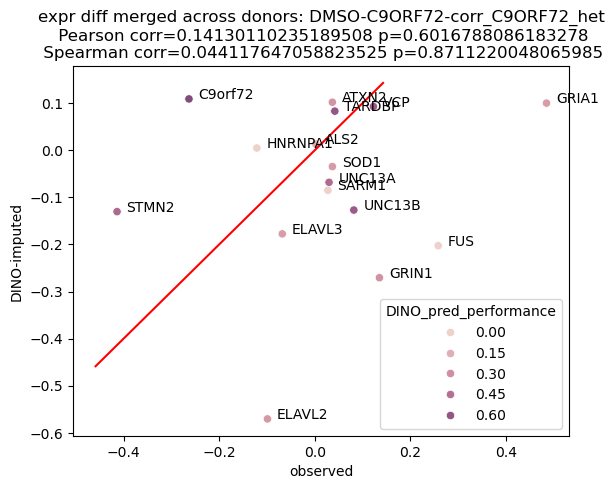

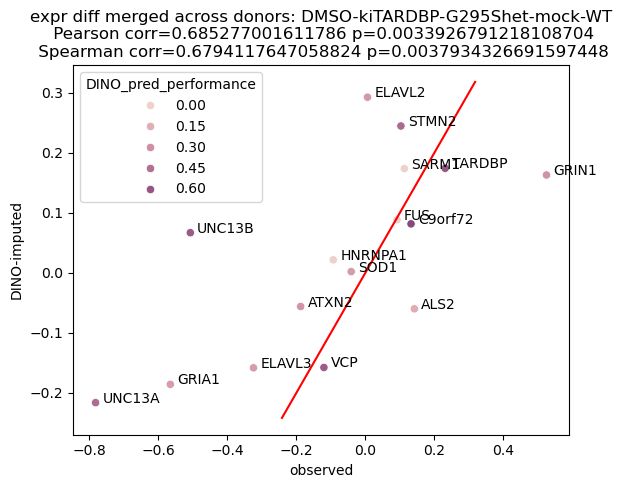

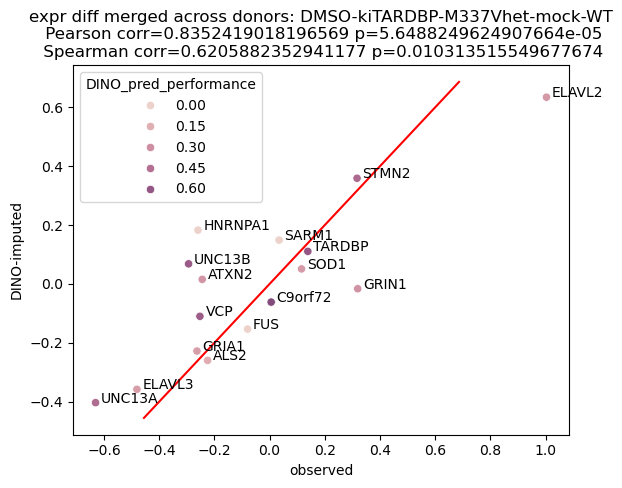

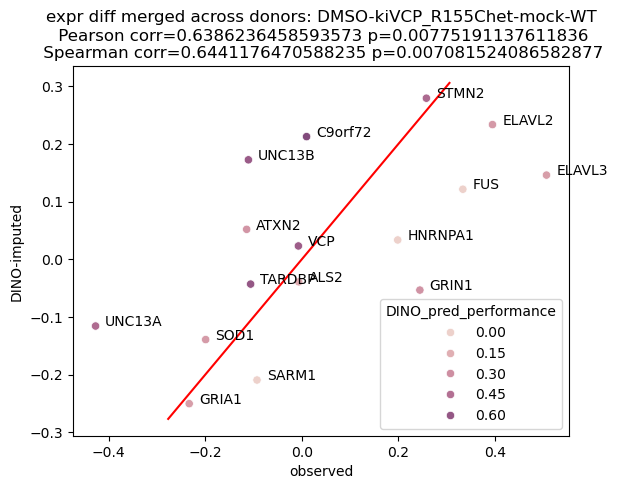

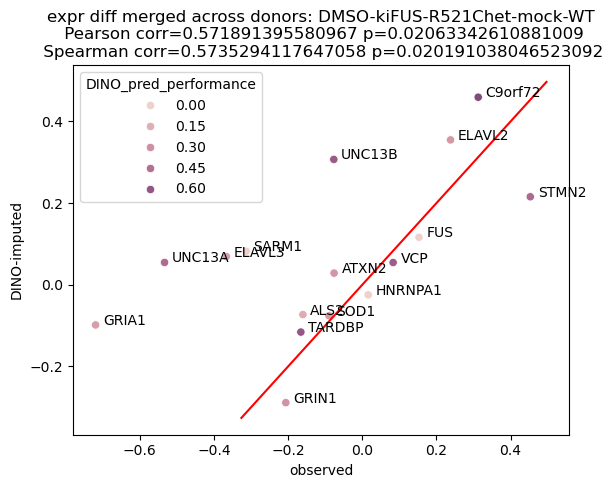

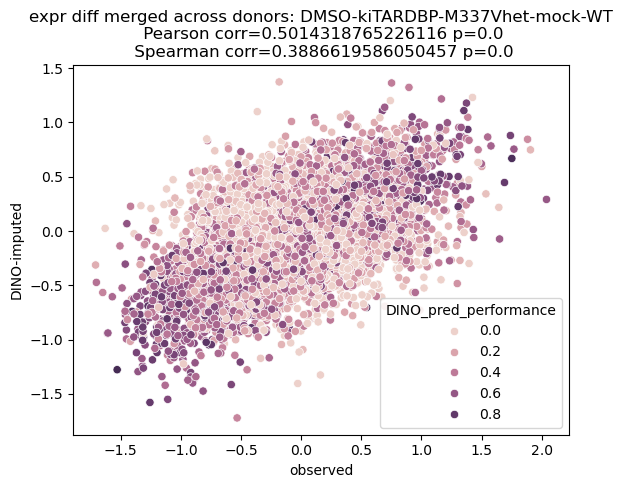

In [6]:
mutant_wt_pairs = [
    ['C9ORF72', 'corr_C9ORF72_het'],
    ['kiTARDBP-G295Shet', 'mock-WT'],
    ['kiTARDBP-M337Vhet', 'mock-WT'],
    ['kiVCP_R155Chet', 'mock-WT'],
    ['kiFUS-R521Chet', 'mock-WT'],
]

perform_dict = load_performance(
    focal_stressors=['DMSO'],
    performance_topdir=performance_topdir,
    focal_dino='iDINO_v3_4channel_DAPI_TDP43_STMN2_TUJ1_224crop',
    focal_rna='CPM_z'
)


# ALS genes
out_als_genes = plot_imputations(
    all_dfs=all_df_ori[all_df_ori['gene'].isin(genes_of_interest)].copy(),
    stressors=['DMSO'],
    mutant_wt_pairs=mutant_wt_pairs,
    perform_dict=perform_dict,
    plot_label=True,
)

# All genes with DMSO
out_all_genes = plot_imputations(
    all_dfs=all_df_ori[all_df_ori['gene'].isin(all_genes)].copy(),
    stressors=["DMSO"],
    mutant_wt_pairs=[['kiTARDBP-M337Vhet', 'mock-WT']],
    perform_dict=perform_dict,
    plot_label=False,
)